**Exploratory Data Analysis**  

**Statistics**  

___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

# Import data

In [2]:
returns = pd.read_excel('hist_data.xlsx').set_index('Date').pct_change().dropna()
losses = pd.read_excel('losses.xlsx').set_index('Date').loc[:, 0] / 1e6
display(returns.tail())
display(losses.tail())

,SP500,Commo,TBond
Date,,,
2023-12-22,0.001772,0.008827,-0.001512
2023-12-26,0.004110,0.000535,0.003787
2023-12-27,0.001762,0.011515,0.013078
2023-12-28,-0.000259,-0.003843,-0.005958
2023-12-29,-0.002535,-0.005545,-0.001499


Date
2023-12-22   -0.219777
2023-12-26   -0.329805
2023-12-27   -0.710735
2023-12-28    0.268532
2023-12-29    0.282610
Name: 0, dtype: float64

# Summary statistics using *pandas*

Use the `pandas.DataFrame.describe` method  
<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html>.

In [3]:
returns.describe()

,SP500,Commo,TBond
count,1258.000000,1258.000000,1258.000000
mean,0.000608,0.000427,-0.000101
std,0.013328,0.009881,0.007316
min,-0.103765,-0.049787,-0.040274
25%,-0.004968,-0.004188,-0.004367
50%,0.000860,0.000505,-0.000196
75%,0.007333,0.005556,0.004040
max,0.097951,0.059477,0.037347


Use the `pandas.DataFrame.mean() / .std() / .skew() / .kurt()` methods.

In [6]:
returns.kurt()

SP500    12.557119
Commo     4.327102
TBond     2.493257
dtype: float64

In [7]:
print(f"mean loss         : {losses.mean():.3f} m€")
print(f"median loss       : {          :.3f} m€")
print(f"standard deviation: {          :.3f} m€")
print(f"skewness          : {          :.4f}")
print(f"kurtosis          : {          :.4f}")

mean loss         : -0.036 m€


# Summary statistics using *scipy.stats*

Find the names of the methods to complete the cell below.  
- Mean, median and standard deviation have to be computed using *pandas* methods.  
- Skew and kurtosis use *scipy.stats* functions. See the "Summary statistics" section in <https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics>.

In [8]:
stats.skew(returns)

array([-0.59931057, -0.10671237,  0.10333392])

Use `scipy.stats.describe`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html

In [9]:
desc_res = stats.describe(losses)
desc_res

DescribeResult(nobs=1258, minmax=(-5.951403346606064, 5.826665911891337), mean=-0.03590236669691908, variance=0.5337666315731217, skewness=0.23993455240053568, kurtosis=10.508279710362261)

In [10]:
desc_res.mean

-0.03590236669691908

In [11]:
desc_res.minmax

(-5.951403346606064, 5.826665911891337)

# Quantiles

Use `scipy.stats.scoreatpercentile()` to find the quantiles of the S&P 500 returns at the given percentiles.  
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.scoreatpercentile.html>

In [12]:
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]

for p in percentiles:
    quantile = stats.scoreatpercentile(losses, p)
    print(f"{p:02d}%-quantile = {quantile:.3f} m€")

01%-quantile = -1.799 m€
05%-quantile = -1.033 m€
10%-quantile = -0.781 m€
25%-quantile = -0.393 m€
50%-quantile = -0.066 m€
75%-quantile = 0.310 m€
90%-quantile = 0.742 m€
95%-quantile = 1.062 m€
99%-quantile = 2.014 m€


# Normal Probability plot

Use `scipy.stats.probplot` to draw a Normal Probabiliity plot of `x`.\
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html>\
Note that you need to capture the output of the `probplot()` function to avoid cluttering your screen. Here we save this output in the variable `res`.

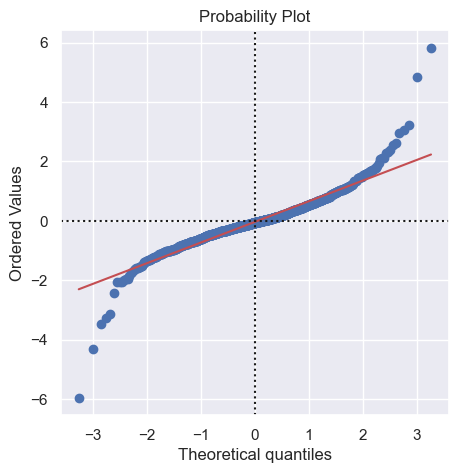

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
res = stats.probplot(losses, plot=ax)
ax.axhline(0, c='k', ls=':')
ax.axvline(0, c='k', ls=':');

# Q-Q Plot with Student's t distribution

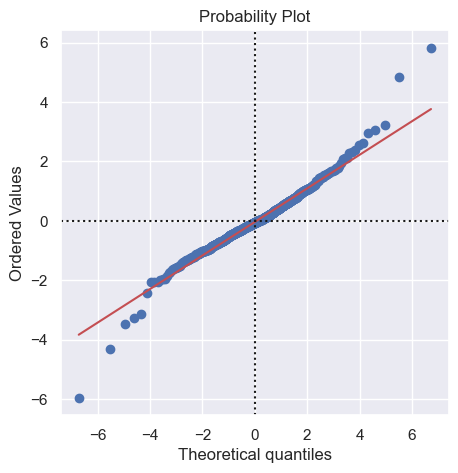

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
res = stats.probplot(losses, sparams=(5), dist='t', plot=ax)
ax.axhline(0, c='k', ls=':')
ax.axvline(0, c='k', ls=':');

Using `scipy.stats.probplot`, draw three Q-Q plots versus the Student's $t$ distribution with the degrees of freedom given in the *list*.

In [17]:
axs[0]

<Axes: >

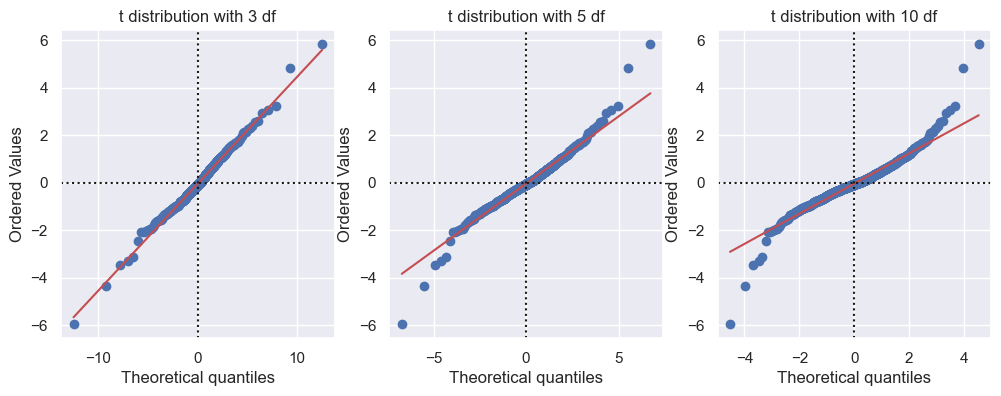

In [21]:
df_list = [3, 5, 10]

fig, axs = plt.subplots(1, 3, figsize=(12,4))
for ax, nu in zip(axs, df_list):
    res = stats.probplot(losses, sparams=(nu), dist='t', plot=ax)
    ax.axhline(0, c='k', ls=':')
    ax.axvline(0, c='k', ls=':')
    ax.set_title(f"t distribution with {nu} df")

# Statistical tests of normality

## Standardized values

We start by computing the standardized values of `x`.

In [22]:
x = losses
z = (x - x.mean()) / x.std()

Some descriptive statistics illustrate the differences between `x` and `z`.

In [23]:
x_des = stats.describe(x)
z_des = stats.describe(z)

df = pd.DataFrame(data=[[x_des.minmax[0], z_des.minmax[0]],
                        [x_des.minmax[1], z_des.minmax[1]],
                        [x_des.mean, z_des.mean],
                        [np.sqrt(x_des.variance), np.sqrt(z_des.variance)],
                        [x_des.skewness, z_des.skewness],
                        [x_des.kurtosis, z_des.kurtosis]],
                  index=['min', 'max', 'mean', 'std dev', 'skewness', 'kurtosis'],
                  columns=['raw data', 'standardized data'])

df.round(5)

,raw data,standardized data
min,-5.95140,-8.09684
max,5.82667,8.02439
mean,-0.03590,-0.00000
std dev,0.73059,1.00000
skewness,0.23993,0.23993
kurtosis,10.50828,10.50828


## Kolmogorov-Smirnov
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html>

Perform the KS test on 
1. `x`,
2. `z`, 
3. `x` specifying the mean and std with the argument `args=(x.mean(), x.std())`.

In [24]:
# wrong method
res = stats.kstest(x, cdf='norm')
print(f'statistic= {res.statistic:.4f} | p-value= {res.pvalue:.4%}')

statistic= 0.1414 | p-value= 0.0000%


In [25]:
res = stats.kstest(x, cdf='norm', args=(x.mean(), x.std()))
print(f'statistic= {res.statistic:.4f} | p-value= {res.pvalue:.4%}')

statistic= 0.0756 | p-value= 0.0001%


In [26]:
res = stats.kstest(x, cdf=stats.norm(x.mean(), x.std()).cdf)
print(f'statistic= {res.statistic:.4f} | p-value= {res.pvalue:.4%}')

statistic= 0.0756 | p-value= 0.0001%


In [27]:
res = stats.kstest(z, cdf='norm')
print(f'statistic= {res.statistic:.4f} | p-value= {res.pvalue:.4%}')

statistic= 0.0756 | p-value= 0.0001%


In [28]:
res = stats.kstest(z, cdf=stats.norm().cdf)
print(f'statistic= {res.statistic:.4f} | p-value= {res.pvalue:.4%}')

statistic= 0.0756 | p-value= 0.0001%


KS test is sensitive to the standardization of the data

## Anderson-Darling
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html>

Perform the Anderson-Darling test on `x` and `z` for comparison.

In [29]:
res = stats.anderson(x)
print(f'statistic: {res.statistic:.4f}')
print('critical values: ', res.critical_values)
print('significance levels: ', res.significance_level)

statistic: 17.5461
critical values:  [0.574 0.654 0.785 0.915 1.089]
significance levels:  [15.  10.   5.   2.5  1. ]


In [30]:
res = stats.anderson(z)
print(f'statistic: {res.statistic:.4f}')
print('critical values: ', res.critical_values)
print('significance levels: ', res.significance_level)

statistic: 17.5461
critical values:  [0.574 0.654 0.785 0.915 1.089]
significance levels:  [15.  10.   5.   2.5  1. ]


## Jarque-Bera
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html>

Perform the Jarque-Bera test on `x` and `z` for comparison.

In [31]:
res = stats.jarque_bera(x)
print(f'Jarque-Bera test: statistic={res.statistic:0.2f} ; p-value={res.pvalue:0.4f}')

Jarque-Bera test: statistic=5800.13 ; p-value=0.0000


In [32]:
res = stats.jarque_bera(z)
print(f'Jarque-Bera test: statistic={res.statistic:0.2f} ; p-value={res.pvalue:0.4f}')

Jarque-Bera test: statistic=5800.13 ; p-value=0.0000
